# Exploration of Titanic dataset

This is as part of the initial warmup assignment and data exploration for the first DataScience16 project. To begin, we import the dataset:

In [15]:
import pandas as pd

data = pd.read_csv('train.csv')

print data.head()
print data.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
       P

The output from `data.head()` shows us all columns in the dataset, along with the first few rows containing data. This is useful to show us the general idea when we want to go through the data, but `data.describe()` can be more useful by giving us a general overview of all the data, including functions such as mean, min, max, and totals. From this output, we can begin looking more into the data.

## Exploring Age Information

Starting to dive into the data, we look at the amount of people in each different age group aboard the ship.

In [16]:
print len(data[data.Age <= 18].Age), ": less than 18 years old (children)"
print len(data[(data.Age > 18) & (data.Age <= 28)].Age), ": between the ages of 19 and 28"
print len(data[(data.Age > 28) & (data.Age <= 38)].Age), ": between the ages of 29 and 38"
print len(data[(data.Age > 38) & (data.Age <= 48)].Age), ": between the ages of 39 and 48"
print len(data[(data.Age > 48) & (data.Age <= 58)].Age), ": between the ages of 49 and 58"
print len(data[(data.Age > 58)].Age), ": between the ages of 59 and up"

139 : less than 18 years old (children)
223 : between the ages of 19 and 28
175 : between the ages of 29 and 38
97 : between the ages of 39 and 48
52 : between the ages of 49 and 58
28 : between the ages of 59 and up


This gives us a bit of insight into the largest age group in the ship, but not much more than that. To dive more into this, we can start going through each age to figure out how many people are in each. To start, we can use `value_counts()` to show how many values are attributed to each key, per say. Sorting that gives us a nice count from min to max.

In [17]:
print data.Age.value_counts().sort_index()

0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Name: Age, dtype: int64


Great! Now, we can easily show what these values look like visually on a plot.

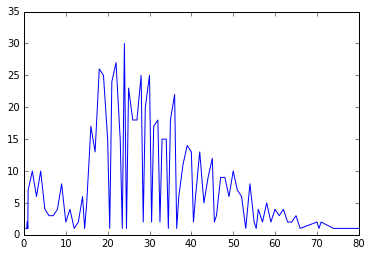

In [18]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(data.Age.value_counts().sort_index())
plt.ylim([0,35])
plt.show()

While this is a nice representation of the age groups aboard the ship, we haven't actually done anything interesting with the data, so let's do that! First, we are going to show the survival rates for the individuals in each age group.

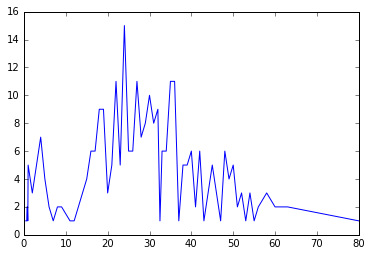

In [19]:
%matplotlib inline

plt.plot(data[(data.Survived == 1)].Age.value_counts().sort_index())
plt.show()

Now this result is not too surprising. The general trend still follows of the previous graph, showing that the largest age group also had the highest survivor count.

Next, let's look at male/female survival in each age group.

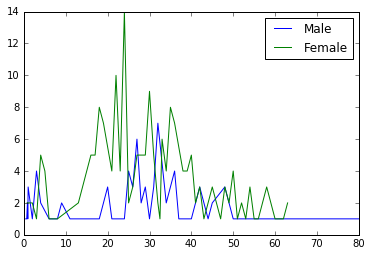

In [20]:
%matplotlib inline

plt.plot(data[(data.Survived == 1) & (data.Sex == 'male')].Age.value_counts().sort_index())
plt.plot(data[(data.Survived == 1) & (data.Sex == 'female')].Age.value_counts().sort_index())
plt.legend(['Male', 'Female'])
plt.show()

This follows with the idea of women and children first. 

Finally, looking at the converse, let's show who had the lowest surivor rate.

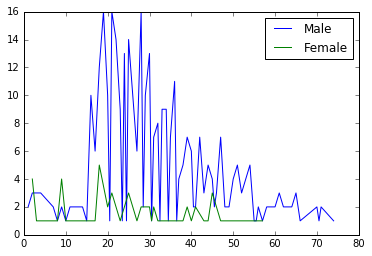

In [21]:
%matplotlib inline

plt.plot(data[(data.Survived == 0) & (data.Sex == 'male')].Age.value_counts().sort_index())
plt.plot(data[(data.Survived == 0) & (data.Sex == 'female')].Age.value_counts().sort_index())
plt.legend(['Male', 'Female'])
plt.show()

This ultimately shows the amount of men and women who did not survive, as compared to the previous graph of men and women who survived.